In [3]:
!pip install xgboost
import pandas as pd #for building dataframes from CSV files
import seaborn as sns #for fancy charts
import numpy as np #for np.nan
from scipy import stats #for statistical analysis
from scipy.stats import norm #for statistical analysis
from datetime import datetime #for time-series plots
import statsmodels #for integration with pandas and analysis
import statsmodels.api as sm # for regression modules
from statsmodels.formula.api import ols # for regression modules
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
%matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [12]:
import pandas as pd

file_list = ["health_ineq_online_table_1.csv", "health_ineq_online_table_2.csv", "health_ineq_online_table_3.csv", "health_ineq_online_table_4.csv", "health_ineq_online_table_5.csv", "health_ineq_online_table_6.csv","health_ineq_online_table_7.csv", "health_ineq_online_table_8.csv", "health_ineq_online_table_9.csv", "health_ineq_online_table_10.csv", "health_ineq_online_table_11.csv", "health_ineq_online_table_12.csv", "health_ineq_online_table_13.csv", "health_ineq_online_table_14.csv", "health_ineq_online_table_15.csv", "health_ineq_online_table_16.csv"]
dataframes = []

for file in file_list:
    df = pd.read_csv(file, encoding='latin-1')
    dataframes.append(df)

In [13]:
df

,gnd,indv_pctile,age_at_d,yod,lag,mortrate,indv_inc,deaths,count
0,F,1,40,2001,2,0.001912,1.637001e+00,40,20922
1,F,1,40,2002,2,0.002627,1.401995e+00,55,20940
2,F,1,40,2003,2,0.001847,9.445581e-01,38,20572
3,F,1,40,2004,2,0.002564,7.256386e-01,51,19890
4,F,1,40,2005,2,0.002574,6.136361e-01,45,17482
...,...,...,...,...,...,...,...,...,...
85395,M,100,74,2013,13,0.015134,1.795466e+06,129,8524
85396,M,100,74,2014,13,0.014358,1.499734e+06,127,8845
85397,M,100,75,2013,14,0.015805,1.667006e+06,130,8225
85398,M,100,75,2014,14,0.016319,1.795466e+06,137,8395


In [14]:
df.columns

Index(['gnd', 'indv_pctile', 'age_at_d', 'yod', 'lag', 'mortrate', 'indv_inc',
       'deaths', 'count'],
      dtype='object')

In [15]:
#Always make sure if there are missing values
df.isna().sum()

gnd            0
indv_pctile    0
age_at_d       0
yod            0
lag            0
mortrate       0
indv_inc       0
deaths         0
count          0
dtype: int64

In [16]:
df.describe()

,indv_pctile,age_at_d,yod,lag,mortrate,indv_inc,deaths,count
count,85400.000000,85400.000000,85400.000000,85400.000000,85400.000000,8.540000e+04,85400.000000,85400.000000
mean,50.500000,55.016393,2008.032787,3.065574,0.005959,5.974699e+04,77.131721,16145.098536
std,28.866239,9.246217,3.995788,2.514685,0.006321,1.301909e+05,59.198832,3992.271158
min,1.000000,40.000000,2001.000000,2.000000,0.000000,4.856821e-01,0.000000,4730.000000
25%,25.750000,47.000000,2005.000000,2.000000,0.001743,1.739166e+04,33.000000,12361.750000
50%,50.500000,55.000000,2008.000000,2.000000,0.003641,3.669364e+04,60.000000,17322.000000
75%,75.250000,62.000000,2012.000000,2.000000,0.007840,6.374186e+04,106.000000,19452.000000
max,100.000000,76.000000,2014.000000,15.000000,0.067797,2.447709e+06,558.000000,23229.000000


In [17]:
df.shape

(85400, 9)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85400 entries, 0 to 85399
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gnd          85400 non-null  object 
 1   indv_pctile  85400 non-null  int64  
 2   age_at_d     85400 non-null  int64  
 3   yod          85400 non-null  int64  
 4   lag          85400 non-null  int64  
 5   mortrate     85400 non-null  float64
 6   indv_inc     85400 non-null  float64
 7   deaths       85400 non-null  int64  
 8   count        85400 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 5.9+ MB


In [ ]:
#No missing variables based on above information

In [19]:
# find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 8 numerical variables

The numerical variables are : ['indv_pctile', 'age_at_d', 'yod', 'lag', 'mortrate', 'indv_inc', 'deaths', 'count']


In [20]:
# view the numerical variables
df[numerical].head()

,indv_pctile,age_at_d,yod,lag,mortrate,indv_inc,deaths,count
0,1,40,2001,2,0.001912,1.637001,40,20922
1,1,40,2002,2,0.002627,1.401995,55,20940
2,1,40,2003,2,0.001847,0.944558,38,20572
3,1,40,2004,2,0.002564,0.725639,51,19890
4,1,40,2005,2,0.002574,0.613636,45,17482


In [21]:
df_num = df[numerical]
df_num

,indv_pctile,age_at_d,yod,lag,mortrate,indv_inc,deaths,count
0,1,40,2001,2,0.001912,1.637001e+00,40,20922
1,1,40,2002,2,0.002627,1.401995e+00,55,20940
2,1,40,2003,2,0.001847,9.445581e-01,38,20572
3,1,40,2004,2,0.002564,7.256386e-01,51,19890
4,1,40,2005,2,0.002574,6.136361e-01,45,17482
...,...,...,...,...,...,...,...,...
85395,100,74,2013,13,0.015134,1.795466e+06,129,8524
85396,100,74,2014,13,0.014358,1.499734e+06,127,8845
85397,100,75,2013,14,0.015805,1.667006e+06,130,8225
85398,100,75,2014,14,0.016319,1.795466e+06,137,8395


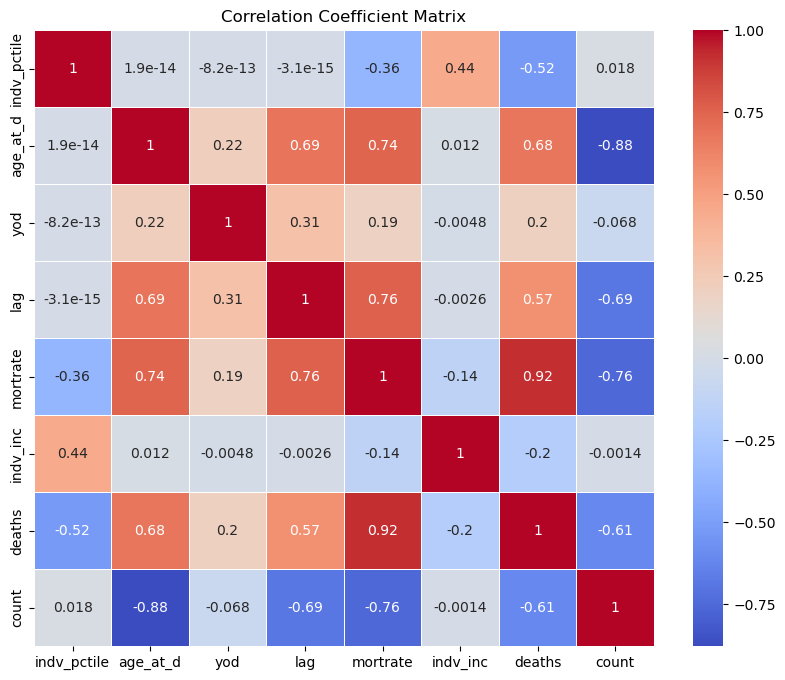

In [22]:
# Correlation in numerial data
# Assuming df_num is your DataFrame
correlation_matrix = df_num.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set plot title
plt.title('Correlation Coefficient Matrix')

# Display the plot
plt.show()

In [23]:
# Checking subcategories for numerical variables to see if some integer valued variables are actually categorical
for column in df_num:
    num_categories = df_num[column].nunique()
    print(f"Number of categories in {column}: {num_categories}")

Number of categories in indv_pctile: 100
Number of categories in age_at_d: 37
Number of categories in yod: 14
Number of categories in lag: 14
Number of categories in mortrate: 78855
Number of categories in indv_inc: 67200
Number of categories in deaths: 425
Number of categories in count: 13553


In [ ]:
#Next check for outliers

In [24]:
df_num.columns

Index(['indv_pctile', 'age_at_d', 'yod', 'lag', 'mortrate', 'indv_inc',
       'deaths', 'count'],
      dtype='object')

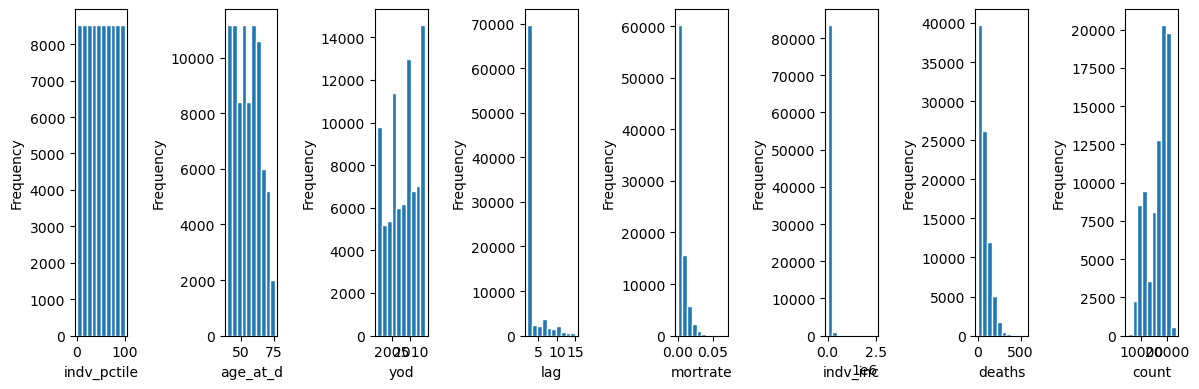

In [25]:
# Define the numerical variables
numerical_vars = ['indv_pctile', 'age_at_d', 'yod', 'lag', 'mortrate', 'indv_inc',
       'deaths', 'count']

# Create subplots for histograms
fig, axs = plt.subplots(1, len(numerical_vars), figsize=(12, 4))

# Plot histograms for each numerical variable
for i, var in enumerate(numerical_vars):
    axs[i].hist(df_num[var], edgecolor='white', align='mid')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

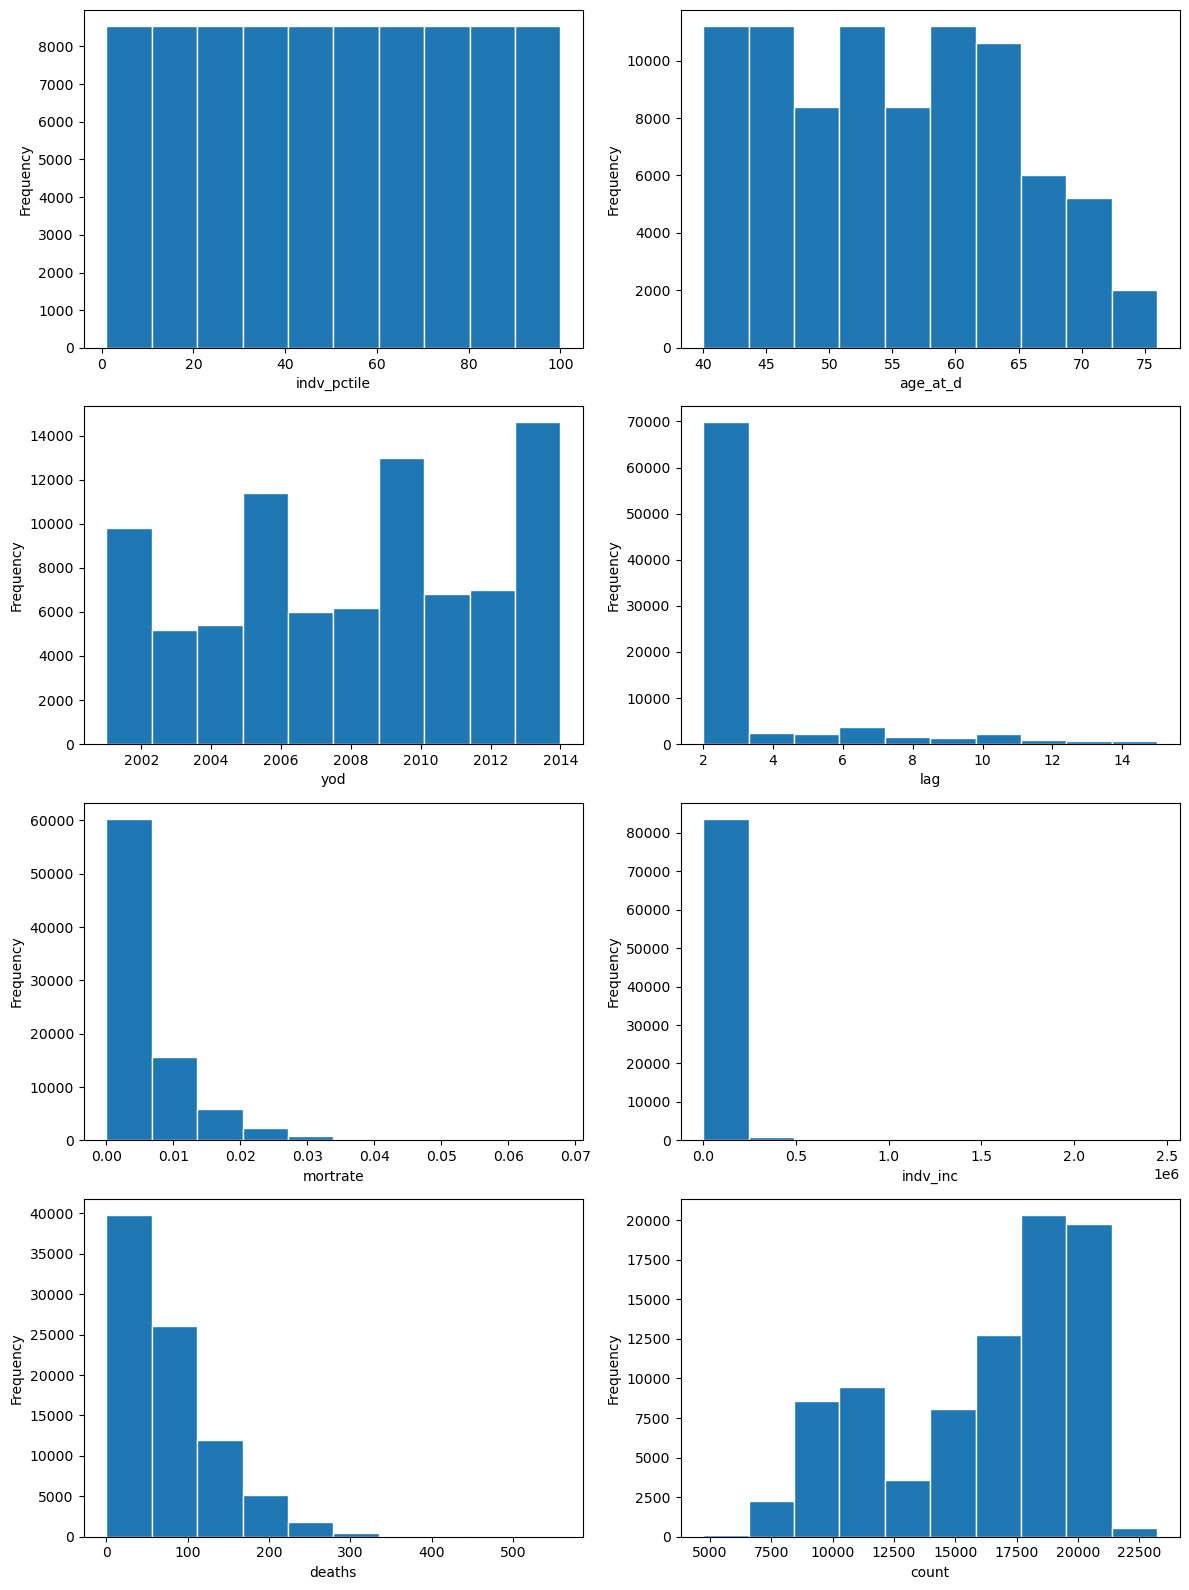

In [26]:
# Define the numerical variables
numerical_vars = ['indv_pctile', 'age_at_d', 'yod', 'lag', 'mortrate', 'indv_inc',
       'deaths', 'count']

# Calculate the number of rows and columns for subplots
num_plots = len(numerical_vars)
num_rows = num_plots // 2
num_cols = num_plots % 2

# Create subplots for histograms
fig, axs = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axs array if there is only one row
if num_rows == 1:
    axs = axs.reshape(1, -1)

# Plot histograms for each numerical variable
for i, var in enumerate(numerical_vars):
    row = i // 2
    col = i % 2
    axs[row, col].hist(df_num[var], edgecolor='white', align='mid')
    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

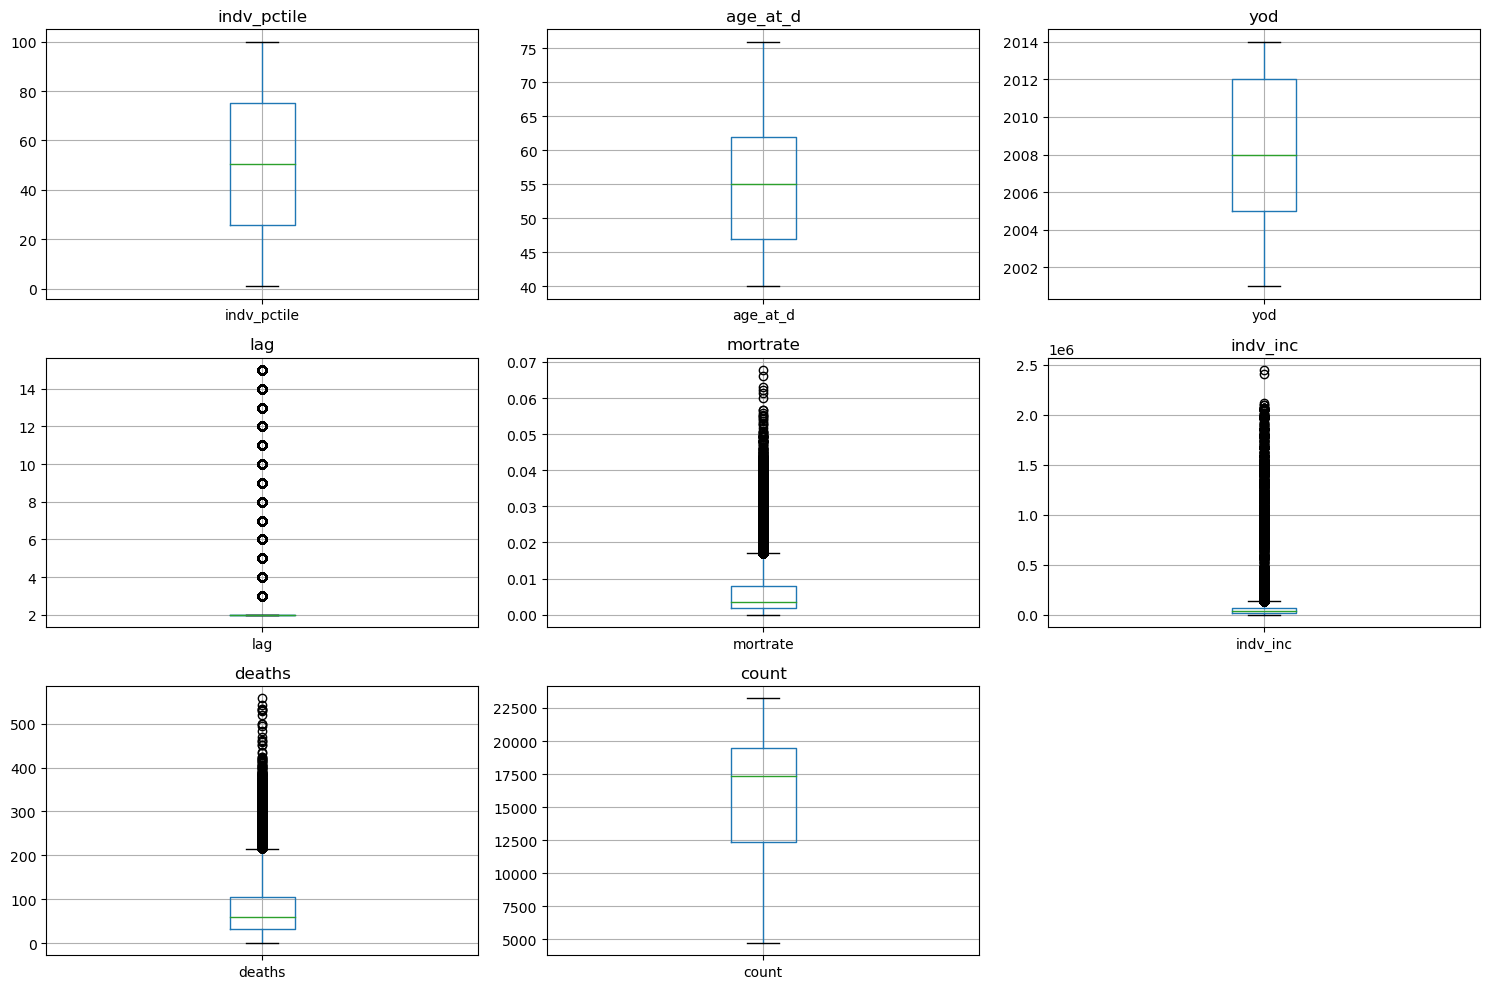

In [27]:
# Define the numerical variables
numerical_vars = ['indv_pctile', 'age_at_d', 'yod', 'lag', 'mortrate', 'indv_inc',
       'deaths', 'count']

# Create subplots for box plots
plt.figure(figsize=(15, 10))

for i, var in enumerate(numerical_vars):
    plt.subplot(3, 3, i+1)
    boxplot = df_num.boxplot(column=var)
    boxplot.set_title(var)
    boxplot.set_ylabel('')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [29]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Define the numerical variables
numerical_vars = ['indv_pctile', 'age_at_d', 'yod', 'lag', 'mortrate', 'indv_inc',
       'deaths', 'count']

# Apply Winsorization to reduce outliers
winsorized_df = df_num.copy()
for var in numerical_vars:
    q_low = df_num[var].quantile(0.01)
    q_high = df_num[var].quantile(0.99)
    winsorized_df[var] = df_num[var].clip(q_low, q_high)

# Apply scaling to the winsorized DataFrame
scaler = MinMaxScaler()  # or StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(winsorized_df[numerical_vars]), columns=numerical_vars)

# Display the scaled DataFrame
print(scaled_df)

       indv_pctile  age_at_d       yod  lag  mortrate  indv_inc    deaths  \
0              0.0       0.0  0.000000  0.0  0.050329       0.0  0.123552   
1              0.0       0.0  0.076923  0.0  0.074593       0.0  0.181467   
2              0.0       0.0  0.153846  0.0  0.048133       0.0  0.115830   
3              0.0       0.0  0.230769  0.0  0.072473       0.0  0.166023   
4              0.0       0.0  0.307692  0.0  0.072811       0.0  0.142857   
...            ...       ...       ...  ...       ...       ...       ...   
85395          1.0       1.0  0.923077  1.0  0.499212       1.0  0.467181   
85396          1.0       1.0  1.000000  1.0  0.472889       1.0  0.459459   
85397          1.0       1.0  0.923077  1.0  0.522018       1.0  0.471042   
85398          1.0       1.0  1.000000  1.0  0.539460       1.0  0.498069   
85399          1.0       1.0  1.000000  1.0  0.610320       1.0  0.544402   

          count  
0      0.975003  
1      0.976338  
2      0.949042  
3  

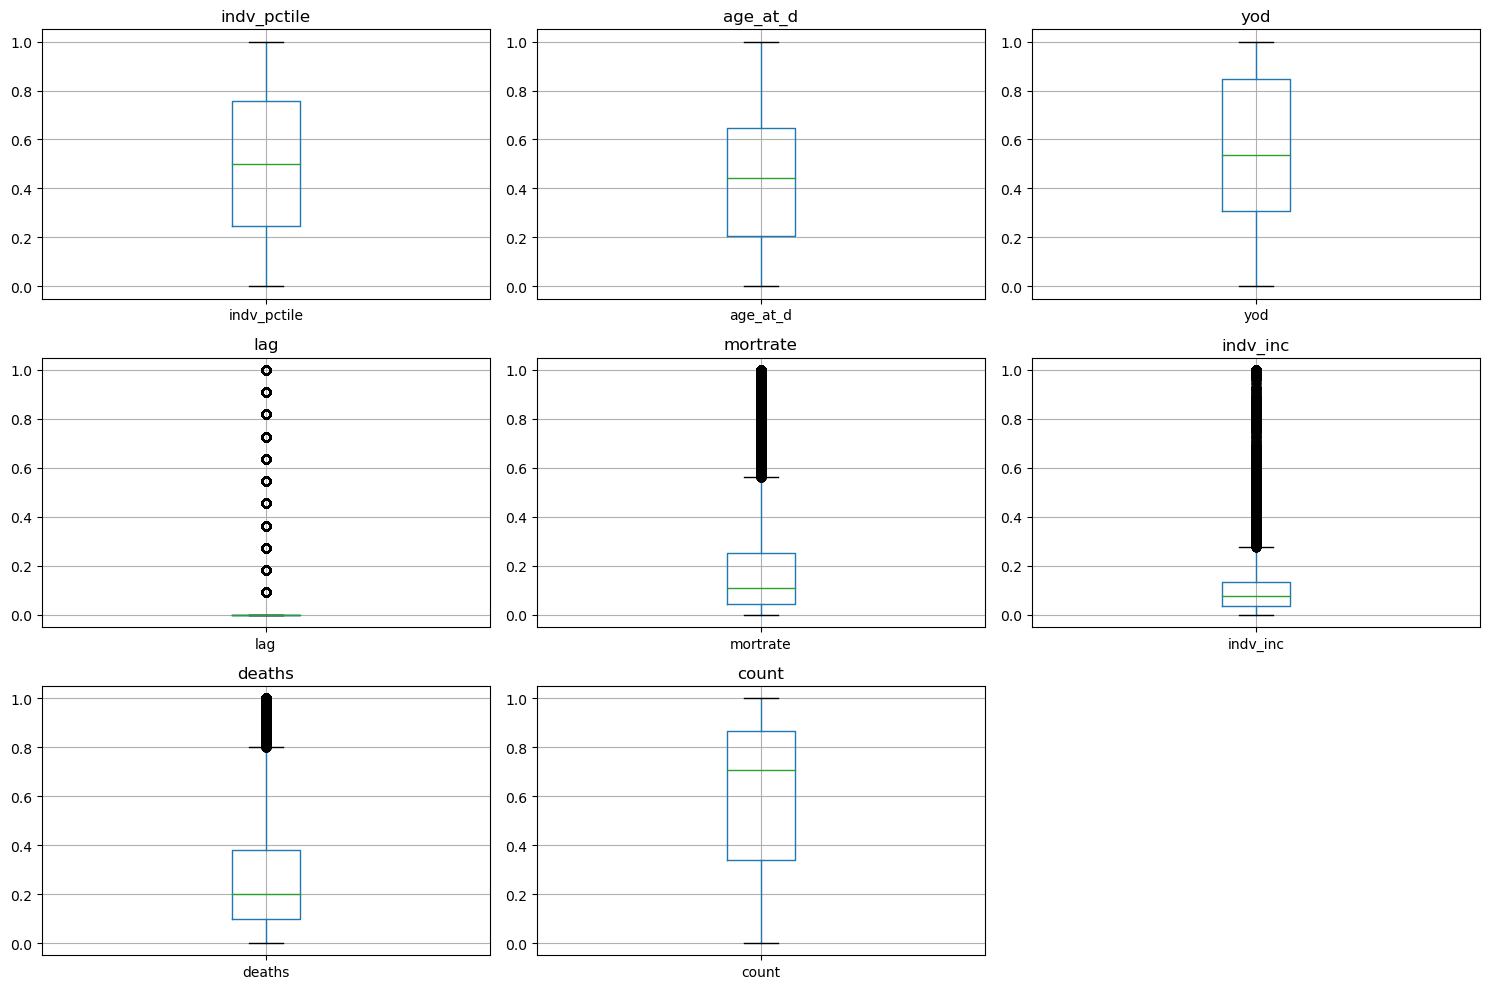

In [30]:
# Define the numerical variables
numerical_vars = ['indv_pctile', 'age_at_d', 'yod', 'lag', 'mortrate', 'indv_inc',
       'deaths', 'count']

# Create subplots for box plots
plt.figure(figsize=(15, 10))

for i, var in enumerate(numerical_vars):
    plt.subplot(3, 3, i+1)
    boxplot = scaled_df.boxplot(column=var)
    boxplot.set_title(var)
    boxplot.set_ylabel('')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [31]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85400 entries, 0 to 85399
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   indv_pctile  85400 non-null  float64
 1   age_at_d     85400 non-null  float64
 2   yod          85400 non-null  float64
 3   lag          85400 non-null  float64
 4   mortrate     85400 non-null  float64
 5   indv_inc     85400 non-null  float64
 6   deaths       85400 non-null  float64
 7   count        85400 non-null  float64
dtypes: float64(8)
memory usage: 5.2 MB


In [32]:
scaled_df

,indv_pctile,age_at_d,yod,lag,mortrate,indv_inc,deaths,count
0,0.0,0.0,0.000000,0.0,0.050329,0.0,0.123552,0.975003
1,0.0,0.0,0.076923,0.0,0.074593,0.0,0.181467,0.976338
2,0.0,0.0,0.153846,0.0,0.048133,0.0,0.115830,0.949042
3,0.0,0.0,0.230769,0.0,0.072473,0.0,0.166023,0.898457
4,0.0,0.0,0.307692,0.0,0.072811,0.0,0.142857,0.719848
...,...,...,...,...,...,...,...,...
85395,1.0,1.0,0.923077,1.0,0.499212,1.0,0.467181,0.055407
85396,1.0,1.0,1.000000,1.0,0.472889,1.0,0.459459,0.079217
85397,1.0,1.0,0.923077,1.0,0.522018,1.0,0.471042,0.033229
85398,1.0,1.0,1.000000,1.0,0.539460,1.0,0.498069,0.045839


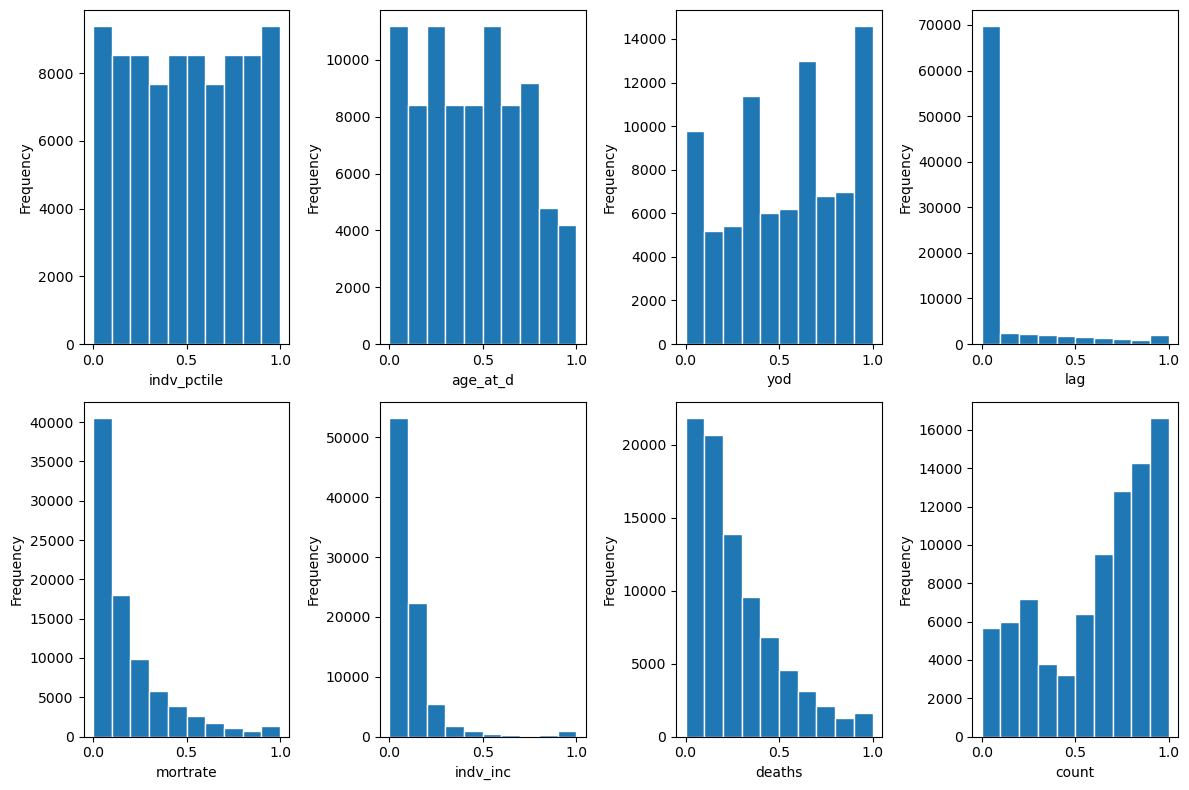

In [33]:
# Create subplots for histograms
fig, axs = plt.subplots(2, 4, figsize=(12, 8))
axs = axs.flatten()

# Plot histograms for each variable
for i, var in enumerate(numerical_vars):
    axs[i].hist(scaled_df[var], bins=10, edgecolor='white', align='mid')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

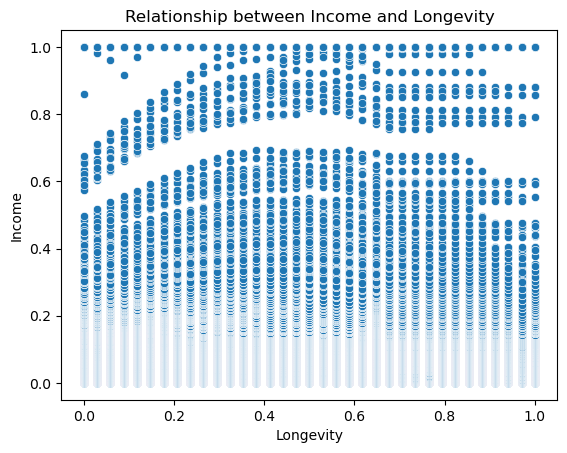

In [34]:
# Plotting the relationship between price and distance
sns.scatterplot(data=scaled_df, x='age_at_d', y='indv_inc')
plt.xlabel('Longevity')
plt.ylabel('Income')
plt.title('Relationship between Income and Longevity')
plt.show()

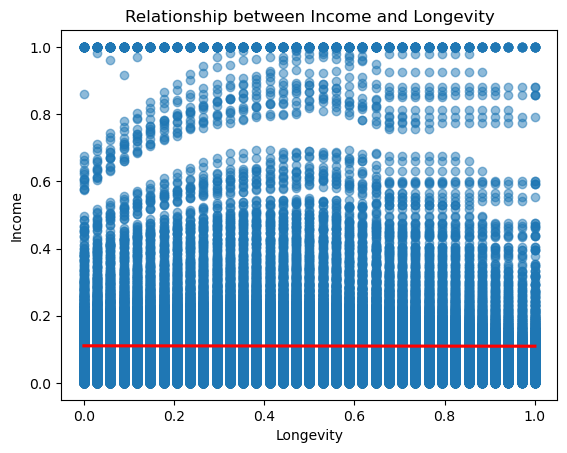

In [35]:
# Plotting the relationship between price and distance
sns.regplot(data=scaled_df, x='age_at_d', y='indv_inc', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.xlabel('Longevity')
plt.ylabel('Income')
plt.title('Relationship between Income and Longevity')
plt.show()